In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
google=pd.read_csv('Google-Playstore-Full.csv')

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
google.head(2)

,App Name,Category,Rating,Reviews,Installs,Size,Price,Content Rating,Last Updated,Minimum Version,Latest Version,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,DoorDash - Food Delivery,FOOD_AND_DRINK,4.548561573,305034,"5,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN
1,TripAdvisor Hotels Flights Restaurants Attract...,TRAVEL_AND_LOCAL,4.400671482,1.20792e+06,"100,000,000+",Varies with device,0,Everyone,"March 29, 2019",Varies with device,Varies with device,NaN,NaN,NaN,NaN


In [4]:
google.drop(columns=['App Name','Category','Size','Last Updated','Minimum Version','Latest Version','Content Rating','Unnamed: 11','Unnamed: 12','Unnamed: 13','Unnamed: 14'],inplace=True)

In [5]:
google.shape

(267052, 4)

In [6]:
google.dropna(subset=['Reviews'],inplace=True)

In [7]:
google=google.drop_duplicates()

In [8]:
google.shape

(165937, 4)

In [9]:
google=google[~google['Rating'].isin(['NEWS_AND_MAGAZINES','GAME_STRATEGY',' Lessons'])]

In [10]:
google['Price'].value_counts()

0          155024
$0.99        1981
$1.99        1460
$2.99        1282
$4.99         851
$3.99         746
$1.49         699
$2.49         484
$3.49         325
$9.99         271
$4.49         246
$5.99         219
$6.99         166
$7.99         160
$5.49         147
$8.99          83
$14.99         70
$6.49          67
$7.49          66
$19.99         55
$12.99         51
$10.99         50
$9.49          49
$1.00          48
$11.99         47
$24.99         42
$2.00          39
$29.99         39
$8.49          34
$13.99         30
            ...  
$6.29           1
$11.10          1
$3.78           1
$8.47           1
$3.33           1
$13.48          1
$1.43           1
$2.42           1
3.1M            1
$3.80           1
16M             1
$2.19           1
$3.09           1
$2.95           1
$374.99         1
$1.58           1
$1.07           1
$309.99         1
$1.66           1
$109.99         1
$4.34           1
$6.16           1
$3.27           1
$4.30           1
$25.99    

In [11]:
google=google[google['Price'].isin(['0'])]

In [12]:
google['Rating']=google['Rating'].astype('float')

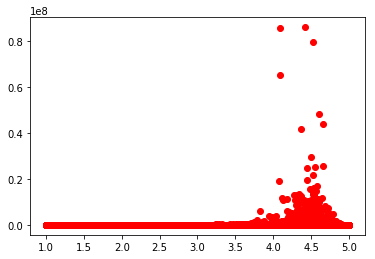

In [13]:
plt.scatter(google['Rating'],google['Reviews'],color='red')

In [14]:
google.shape

(155024, 4)

In [17]:
google[google['Rating']>3.5].shape

(140328, 4)

In [12]:
google[google['Rating']>3].shape

(149917, 4)

In [18]:
google=google[google['Rating']>3]

In [19]:
google.drop(columns=['Price'],inplace=True)

In [20]:
google.shape

(149917, 3)

In [21]:
google.groupby('Installs')['Reviews'].count().sort_values(ascending=False).head(10)

Installs
10,000+        40187
100,000+       36003
50,000+        21169
1,000,000+     12697
5,000+         11894
500,000+        9620
1,000+          8616
10,000,000+     2811
5,000,000+      2789
500+            1744
Name: Reviews, dtype: int64

In [22]:
newdf=google.groupby('Installs')['Reviews'].count().sort_values(ascending=False).head(9).index.tolist()

In [23]:
google=google[google['Installs'].isin(newdf)]

In [24]:
google=google[~google['Installs'].isin(['Mature 17+'])]

In [25]:
google.shape

(145786, 3)

In [26]:
google.head()

,Rating,Reviews,Installs
0,4.548562,305034,"5,000,000+"
2,3.656329,1967,"100,000+"
3,4.107233,389154,"10,000,000+"
5,3.825322,2559,"100,000+"
6,4.267268,421918,"10,000,000+"


In [27]:
def high(number):
    m=int(number)
    return m

In [28]:
google['Reviews']=google['Reviews'].apply(high)

In [29]:
google[google['Reviews']<500000].shape

(145272, 3)

In [30]:
google=google[google['Reviews']<500000]

In [31]:
def smaple(number):
    count=0
    if number[0]=='5':
        for i in range(len(number)):
            if number[i]=='0':
                count+=1
        count+=0.5
    if number[0]=='1':
        for i in range(len(number)):
            if number[i]=='0':
                count+=1
        count+=0.1
    return count

In [32]:
google['Verdict']=""

In [33]:
google.columns

Index(['Rating', 'Reviews', 'Installs', 'Verdict'], dtype='object')

In [34]:
google['Verdict']=google['Installs'].apply(smaple)

In [35]:
google.head(3)

,Rating,Reviews,Installs,Verdict
0,4.548562,305034,"5,000,000+",6.5
2,3.656329,1967,"100,000+",5.1
3,4.107233,389154,"10,000,000+",7.1


In [36]:
google.drop(columns=['Installs'],inplace=True)

In [37]:
google.head(2)

,Rating,Reviews,Verdict
0,4.548562,305034,6.5
2,3.656329,1967,5.1


In [38]:
google['Verdict'].value_counts()

4.1    40187
5.1    36003
4.5    21169
6.1    12697
3.5    11894
5.5     9620
3.1     8616
6.5     2761
7.1     2325
Name: Verdict, dtype: int64

In [39]:
google['Rating'].value_counts()

4.000000    557
4.500000    403
5.000000    260
4.333333    226
4.666667    225
4.250000    189
3.500000    175
4.600000    167
4.750000    166
4.400000    150
3.666667    137
4.200000    127
4.571429    121
4.800000    120
4.428571    118
3.333333    109
3.750000    109
4.166667    108
4.375000    106
4.714286    103
4.285714     98
4.555555     95
4.625000     94
4.142857     93
4.833333     88
4.444445     86
4.222222     85
3.833333     83
4.125000     82
3.800000     81
           ... 
4.403329      1
4.236434      1
4.575627      1
4.508349      1
4.487826      1
4.827834      1
3.611532      1
3.862860      1
3.701815      1
3.542543      1
4.011658      1
4.313824      1
3.799559      1
4.298418      1
4.496945      1
4.638878      1
4.354204      1
4.100980      1
4.545755      1
4.083660      1
3.418103      1
4.340654      1
3.993455      1
4.388448      1
4.630739      1
4.470886      1
4.212495      1
4.039136      1
4.503049      1
3.945443      1
Name: Rating, Length: 92

In [40]:
google[google['Reviews']<10000].shape

(129110, 3)

In [41]:
google['Total rating']=""

In [42]:
google['Total rating']=google['Rating']*google['Verdict']

In [43]:
google.head(2)

,Rating,Reviews,Verdict,Total rating
0,4.548562,305034,6.5,29.56565
2,3.656329,1967,5.1,18.64728


In [44]:
x=google.iloc[:,1:].values

In [45]:
x.shape

(145272, 3)

In [46]:
y=google.iloc[:,0].values

In [47]:
y.shape

(145272,)

In [48]:
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

In [50]:
regressor1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
y_pred=regressor1.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.966682247412233

In [53]:
x_test[600]

array([3122.        ,    5.1       ,   21.35400295])

In [54]:
regressor1.predict(x_test[600].reshape(1,3))

array([4.18272669])

In [55]:
y_test[600]

4.187059402

In [56]:
def fight(rev,install,t_rate):
    a=np.array([rev,install,t_rate])
    return regressor1.predict(a.reshape(1,3))

In [57]:
fight(21,4.1,13.2761906)

array([3.34608804])

In [58]:
x_train.shape

(116217, 3)

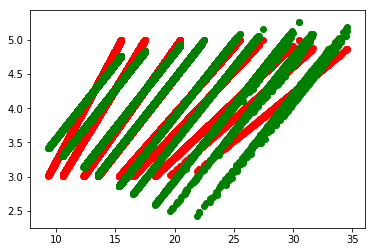

In [59]:
plt.scatter(x_train[:,2],y_train,color='red')   #regressor1.predict(x_train.reshape(21601,2))
plt.scatter(x_train[:,2],regressor1.predict(x_train.reshape(116217,3)),color='green')